In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from numpy import array

In [25]:
df = pd.read_csv(r'C:\Users\barka\OneDrive\Final Project\Data\Manhattan\2019\post_data_prep_all_zones.csv')

In [26]:
df.head()

,pickup_date,weekday,time_binned,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,new_snow,snow_depth,trip_distance,trip_time,speed,num_of_taxis,Zone
0,2019-01-01,Tuesday,00:00 - 00:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.543171,11.890650,12.167499,41,4
1,2019-01-01,Tuesday,01:00 - 01:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.842436,14.737821,11.223936,78,4
2,2019-01-01,Tuesday,02:00 - 02:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.235484,11.183333,11.346154,62,4
3,2019-01-01,Tuesday,03:00 - 03:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.640308,11.701795,12.651760,65,4
4,2019-01-01,Tuesday,04:00 - 04:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.635000,11.158889,13.186688,30,4


In [27]:
df.isna().sum()

pickup_date          0
weekday              0
time_binned          0
Tmax             46165
Tmin             46165
Tavg             46165
Tdep             46165
HDD              46165
CDD              46165
Precipitation    46165
new_snow         46165
snow_depth       46165
trip_distance    46165
trip_time        46165
speed            46165
num_of_taxis         0
Zone                 0
dtype: int64

In [28]:
df.dropna(inplace=True)
df = df.drop(df[df.trip_time < 5].index)
df = df.drop('pickup_date',axis=1)
df.reset_index(inplace=True,drop=True)

In [29]:
df

,weekday,time_binned,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,new_snow,snow_depth,trip_distance,trip_time,speed,num_of_taxis,Zone
0,Tuesday,00:00 - 00:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.543171,11.890650,12.167499,41,4
1,Tuesday,01:00 - 01:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.842436,14.737821,11.223936,78,4
2,Tuesday,02:00 - 02:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.235484,11.183333,11.346154,62,4
3,Tuesday,03:00 - 03:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.640308,11.701795,12.651760,65,4
4,Tuesday,04:00 - 04:59,58.0,39.0,48.5,13.3,16.0,0.0,0.06,0.0,0.0,2.635000,11.158889,13.186688,30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519912,Tuesday,19:00 - 19:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,1.634367,8.410748,11.789618,245,263
519913,Tuesday,20:00 - 20:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,1.564640,8.290106,11.409292,347,263
519914,Tuesday,21:00 - 21:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,1.736828,8.729789,12.242927,268,263
519915,Tuesday,22:00 - 22:59,45.0,36.0,40.5,5.1,24.0,0.0,0.02,0.0,0.0,1.708687,7.692929,13.436525,198,263


In [8]:
# changes the catergorial features to a numberic feature with Dummies.
weekday_dummy = pd.get_dummies(df['weekday'])
time_binned_dummy = pd.get_dummies(df['time_binned'])
dummies = pd.merge(left=weekday_dummy,right=time_binned_dummy,left_index=True,right_index=True)
df = pd.merge(left=dummies,right=df,left_index=True,right_index=True)
df = df.drop(['weekday','time_binned'],axis=1)

In [10]:
df.columns.tolist()

['Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 '00:00 - 00:59',
 '01:00 - 01:59',
 '02:00 - 02:59',
 '03:00 - 03:59',
 '04:00 - 04:59',
 '05:00 - 05:59',
 '06:00 - 06:59',
 '07:00 - 07:59',
 '08:00 - 08:59',
 '09:00 - 09:59',
 '10:00 - 10:59',
 '11:00 - 11:59',
 '12:00 - 12:59',
 '13:00 - 13:59',
 '14:00 - 14:59',
 '15:00 - 15:59',
 '16:00 - 16:59',
 '17:00 - 17:59',
 '18:00 - 18:59',
 '19:00 - 19:59',
 '20:00 - 20:59',
 '21:00 - 21:59',
 '22:00 - 22:59',
 '23:00 - 23:59',
 'index',
 'Tmax',
 'Tmin',
 'Tavg',
 'Tdep',
 'HDD',
 'CDD',
 'Precipitation',
 'new_snow',
 'snow_depth',
 'trip_distance',
 'trip_time',
 'speed',
 'num_of_taxis',
 'Zone']

In [83]:
# Rearrange the cols
cols = df.columns.to_list()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [84]:
print(df.columns)

Index(['Zone', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '00:00 - 00:59', '01:00 - 01:59', '02:00 - 02:59',
       '03:00 - 03:59', '04:00 - 04:59', '05:00 - 05:59', '06:00 - 06:59',
       '07:00 - 07:59', '08:00 - 08:59', '09:00 - 09:59', '10:00 - 10:59',
       '11:00 - 11:59', '12:00 - 12:59', '13:00 - 13:59', '14:00 - 14:59',
       '15:00 - 15:59', '16:00 - 16:59', '17:00 - 17:59', '18:00 - 18:59',
       '19:00 - 19:59', '20:00 - 20:59', '21:00 - 21:59', '22:00 - 22:59',
       '23:00 - 23:59', 'index', 'Tmax', 'Tmin', 'Tavg', 'Tdep', 'HDD', 'CDD',
       'Precipitation', 'new_snow', 'snow_depth', 'trip_distance', 'trip_time',
       'speed', 'num_of_taxis'],
      dtype='object')


In [85]:
y = df.num_of_taxis
X = df[df.columns.tolist()[:-1]]

Feature: 0, Score: -0.06980
Feature: 1, Score: -21368602.55059
Feature: 2, Score: -21368607.74439
Feature: 3, Score: -21368595.97316
Feature: 4, Score: -21368603.46819
Feature: 5, Score: -21368599.78733
Feature: 6, Score: -21368601.40400
Feature: 7, Score: -21368600.17661
Feature: 8, Score: -1784.16605
Feature: 9, Score: -1795.41787
Feature: 10, Score: -1804.95082
Feature: 11, Score: -1813.26413
Feature: 12, Score: -1815.31416
Feature: 13, Score: -1812.63183
Feature: 14, Score: -1793.75779
Feature: 15, Score: -1782.62124
Feature: 16, Score: -1782.98969
Feature: 17, Score: -1789.84355
Feature: 18, Score: -1791.39403
Feature: 19, Score: -1789.78948
Feature: 20, Score: -1784.12568
Feature: 21, Score: -1783.13808
Feature: 22, Score: -1778.75837
Feature: 23, Score: -1779.19547
Feature: 24, Score: -1786.31844
Feature: 25, Score: -1762.87302
Feature: 26, Score: -1737.14109
Feature: 27, Score: -1735.25529
Feature: 28, Score: -1741.13059
Feature: 29, Score: -1734.35708
Feature: 30, Score: -1737

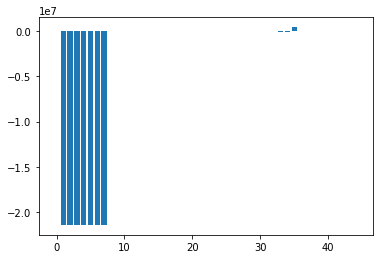

In [86]:
model = LinearRegression()
model.fit(X, y)
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [115]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(519917, 10)


In [116]:
X.shape

(519917, 45)

In [117]:
filter = fs.get_support()
features = array(X.columns.tolist())
print(features[filter])

['Zone' '02:00 - 02:59' '03:00 - 03:59' '04:00 - 04:59' '05:00 - 05:59'
 '06:00 - 06:59' '18:00 - 18:59' 'index' 'trip_distance' 'speed']


In [119]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X_select = df[features[filter]]

data_dmaxtrix = xgb.DMatrix(data=X_select,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
train_pred = xg_reg.predict(X_train)
test_pred = xg_reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
print("RMSE: %f" % (rmse_test))
print("RMSE: %f" % (rmse_train))

C:\Users\barka\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 112.823583
RMSE: 112.953909
